In [3]:
import sys 
from pathlib import Path

#Add the project root to the Python path
project_root = Path.cwd().parent
sys.path.insert(0, str(project_root))

import matplotlib.pyplot as plt
from src.data import fetch_yahoo
from src.walkforward import walkforward_select_param, WalkForwardConfig
from src.features import build_mom_features, build_mr_features

MOM walkforward results


,train_start,train_end,test_start,test_end,best_para,train_sharpe,test_sharpe,test_total_return
0,2010-01-01,2012-12-31,2013-01-01,2013-12-31,60,-0.017354,-2.278389,-0.228130
1,2011-01-01,2013-12-31,2014-01-01,2014-12-31,20,-0.246157,-0.235496,-0.032261
2,2012-01-01,2014-12-31,2015-01-01,2015-12-31,20,-0.408523,-0.033268,-0.016880
3,2013-01-01,2015-12-31,2016-01-01,2016-12-31,180,-0.302614,-1.417924,-0.175663
4,2014-01-01,2016-12-31,2017-01-01,2017-12-31,180,-0.408905,-2.091739,-0.133910
5,2015-01-01,2017-12-31,2018-01-01,2018-12-31,120,-0.955277,-0.047692,-0.022194
6,2016-01-01,2018-12-31,2019-01-01,2019-12-31,120,-0.282461,-0.335817,-0.048982
7,2017-01-01,2019-12-31,2020-01-01,2020-12-31,20,-0.402431,-0.304110,-0.145667
8,2018-01-01,2020-12-31,2021-01-01,2021-12-31,180,0.094024,-0.192593,-0.033164
9,2019-01-01,2021-12-31,2022-01-01,2022-12-31,180,0.029408,0.143425,0.005382


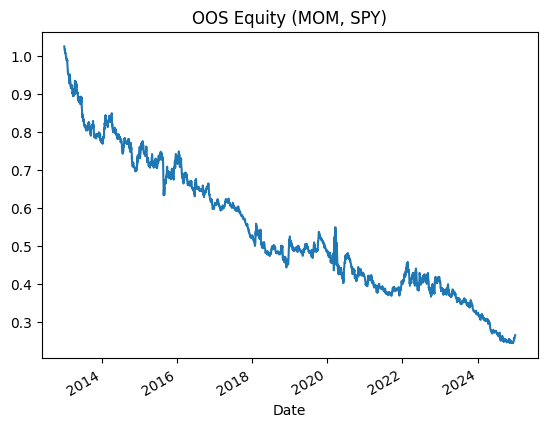

MR walk-forward results


,train_start,train_end,test_start,test_end,best_para,train_sharpe,test_sharpe,test_total_return
0,2010-01-01,2012-12-31,2013-01-01,2013-12-31,10,0.531355,0.053474,-0.000267
1,2011-01-01,2013-12-31,2014-01-01,2014-12-31,10,0.606188,0.153440,0.010993
2,2012-01-01,2014-12-31,2015-01-01,2015-12-31,10,0.426793,0.532522,0.072596
3,2013-01-01,2015-12-31,2016-01-01,2016-12-31,20,1.060760,0.430688,0.048869
4,2014-01-01,2016-12-31,2017-01-01,2017-12-31,20,1.275751,0.240894,0.014158
5,2015-01-01,2017-12-31,2018-01-01,2018-12-31,20,1.234140,-0.192399,-0.045938
6,2016-01-01,2018-12-31,2019-01-01,2019-12-31,20,0.102890,-1.672909,-0.195696
7,2017-01-01,2019-12-31,2020-01-01,2020-12-31,50,-0.116332,-0.666051,-0.243566
8,2018-01-01,2020-12-31,2021-01-01,2021-12-31,50,-0.230572,-0.122439,-0.024200
9,2019-01-01,2021-12-31,2022-01-01,2022-12-31,30,-0.297710,-0.326253,-0.102407


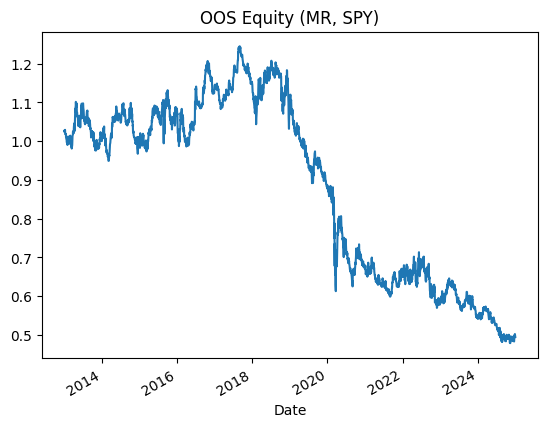

In [6]:
df = fetch_yahoo("SPY", "2010-01-01", "2025-01-01")
cfg = WalkForwardConfig(train_years=3, test_years=1, fee_bps=1.0)

# Momentum: lookback grid
mom_grid = [20, 40, 60, 120, 180]
mom_res, mom_oos = walkforward_select_param(
    df=df, 
    build_features=build_mom_features, 
    signal_col="signal_mom",
    para_grid=mom_grid, 
    cfg=cfg,
    )

print("MOM walkforward results")
display(mom_res)

plt.figure()
mom_oos["oos_equity"].plot()
plt.title("OOS Equity (MOM, SPY)")
plt.show()

# Mean reversion: z-window grid
mr_grid = [10, 20, 30, 50]
mr_res, mr_oos = walkforward_select_param(
    df=df,
    build_features=build_mr_features,
    signal_col="signal_mr",
    para_grid=mr_grid,
    cfg=cfg,
)

print("MR walk-forward results")
display(mr_res)


plt.figure()
mr_oos["oos_equity"].plot()
plt.title("OOS Equity (MR, SPY)")
plt.show()

MOM walkforward results


,train_start,train_end,test_start,test_end,best_para,train_sharpe,test_sharpe,test_total_return
0,2010-01-01,2012-12-31,2013-01-01,2013-12-31,180,-0.051434,0.737303,0.158094
1,2011-01-01,2013-12-31,2014-01-01,2014-12-31,180,0.279389,-1.687873,-0.314925
2,2012-01-01,2014-12-31,2015-01-01,2015-12-31,180,0.027360,-2.296240,-0.467572
3,2013-01-01,2015-12-31,2016-01-01,2016-12-31,60,-0.155005,-0.465362,-0.111085
4,2014-01-01,2016-12-31,2017-01-01,2017-12-31,40,-0.026451,-0.524258,-0.088269
5,2015-01-01,2017-12-31,2018-01-01,2018-12-31,40,0.032309,1.258998,0.336208
6,2016-01-01,2018-12-31,2019-01-01,2019-12-31,40,0.355204,-1.855639,-0.337152
7,2017-01-01,2019-12-31,2020-01-01,2020-12-31,120,0.273826,-1.542817,-0.391607
8,2018-01-01,2020-12-31,2021-01-01,2021-12-31,20,-0.265208,0.221776,0.023858
9,2019-01-01,2021-12-31,2022-01-01,2022-12-31,20,-0.267812,1.932532,0.739355


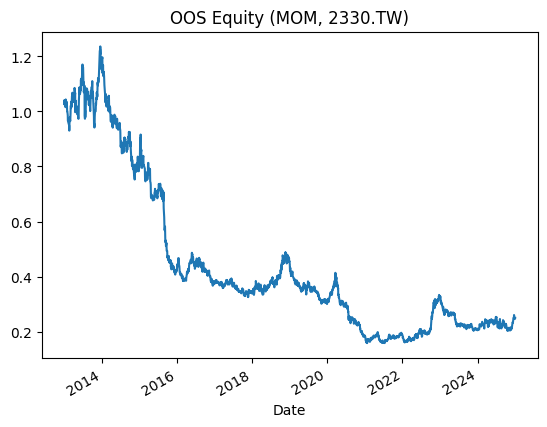

MR walk-forward results


,train_start,train_end,test_start,test_end,best_para,train_sharpe,test_sharpe,test_total_return
0,2010-01-01,2012-12-31,2013-01-01,2013-12-31,30,0.829759,0.739151,0.159157
1,2011-01-01,2013-12-31,2014-01-01,2014-12-31,20,1.163828,0.393857,0.062495
2,2012-01-01,2014-12-31,2015-01-01,2015-12-31,30,1.069534,1.921045,0.590177
3,2013-01-01,2015-12-31,2016-01-01,2016-12-31,20,1.204975,-0.265096,-0.073620
4,2014-01-01,2016-12-31,2017-01-01,2017-12-31,10,1.285361,1.510215,0.243557
5,2015-01-01,2017-12-31,2018-01-01,2018-12-31,10,1.485999,-0.002373,-0.034450
6,2016-01-01,2018-12-31,2019-01-01,2019-12-31,20,0.627738,-1.694360,-0.314587
7,2017-01-01,2019-12-31,2020-01-01,2020-12-31,20,0.150366,-1.203051,-0.328305
8,2018-01-01,2020-12-31,2021-01-01,2021-12-31,20,-0.585159,0.500791,0.090707
9,2019-01-01,2021-12-31,2022-01-01,2022-12-31,10,-0.615978,-0.871786,-0.277653


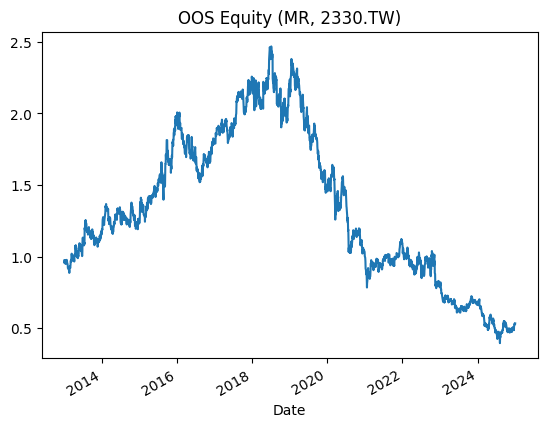

In [8]:
df = fetch_yahoo("2330.TW", "2010-01-01", "2025-01-01")
cfg = WalkForwardConfig(train_years=3, test_years=1, fee_bps=1.0)

# Momentum: lookback grid
mom_grid = [20, 40, 60, 120, 180]
mom_res, mom_oos = walkforward_select_param(
    df=df, 
    build_features=build_mom_features, 
    signal_col="signal_mom",
    para_grid=mom_grid, 
    cfg=cfg,
    )

print("MOM walkforward results")
display(mom_res)

plt.figure()
mom_oos["oos_equity"].plot()
plt.title("OOS Equity (MOM, 2330.TW)")
plt.show()

# Mean reversion: z-window grid
mr_grid = [10, 20, 30, 50]
mr_res, mr_oos = walkforward_select_param(
    df=df,
    build_features=build_mr_features,
    signal_col="signal_mr",
    para_grid=mr_grid,
    cfg=cfg,
)

print("MR walk-forward results")
display(mr_res)


plt.figure()
mr_oos["oos_equity"].plot()
plt.title("OOS Equity (MR, 2330.TW)")
plt.show()